In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import time
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def loader_data(directed, refinement = False):
    
    # check the directed value
    if directed: lab = ''
    else: lab = '_und'
        
    if refinement: ref = '_refinement'
    else: ref = ''
        
    # STATS
    # reading from keys
    with open("results/keys_stats{}{}.txt".format(lab, ref), "r") as f:
        keys = eval(f.read())

    stats = {}
    # reading dataframes
    for key in keys:
        stats[key] = pd.read_csv("results/stats{}_{}{}.csv".format(lab, str(key), ref))
        
    # DATA
    # reading from keys
    with open("results/keys_data{}{}.txt".format(lab, ref), "r") as f:
        keys = eval(f.read())

    data = {}
    # reading dataframes
    for key in keys:
        data[key] = [pd.read_csv("results/data{}_{}_metrics{}.csv".format(lab, str(key), ref)),
                     pd.read_csv("results/data{}_{}_levels{}.csv".format(lab, str(key), ref))]

    return stats, data

In [3]:
stats_dir, data_dir = loader_data(True)
stats_und, data_und = loader_data(False)
stats_dir_ref, data_dir_ref = loader_data(True, True)
stats_und_ref, data_und_ref = loader_data(False, True)

## Results

The graph will be disconnected for values < log(n)/n (sharp phase transition for P: G is connected)

For n = 10^3, this threshold is approximately 0.007

In [4]:
def plot_data(directed, data, refinement = False):
    
    if directed: 
        lab = 'directed'
    else : lab = 'undirected'  
        
    if refinement: 
        ref = '_ref'
    else : ref = ''
    
    fig, axs = plt.subplots(7,2,figsize = (20,40))
    
    for i, k in enumerate(data.keys()):
        axs[i,0].set_title('Metrics with p = {}'.format(k))
        data[k][0].boxplot(ax=axs[i,0])
        axs[i,1].set_title('Levels with p = {}'.format(k))
        data[k][1].boxplot(ax=axs[i,1])    

    plt.savefig('images/box_{}{}.jpeg'.format(lab, ref))
    
    return

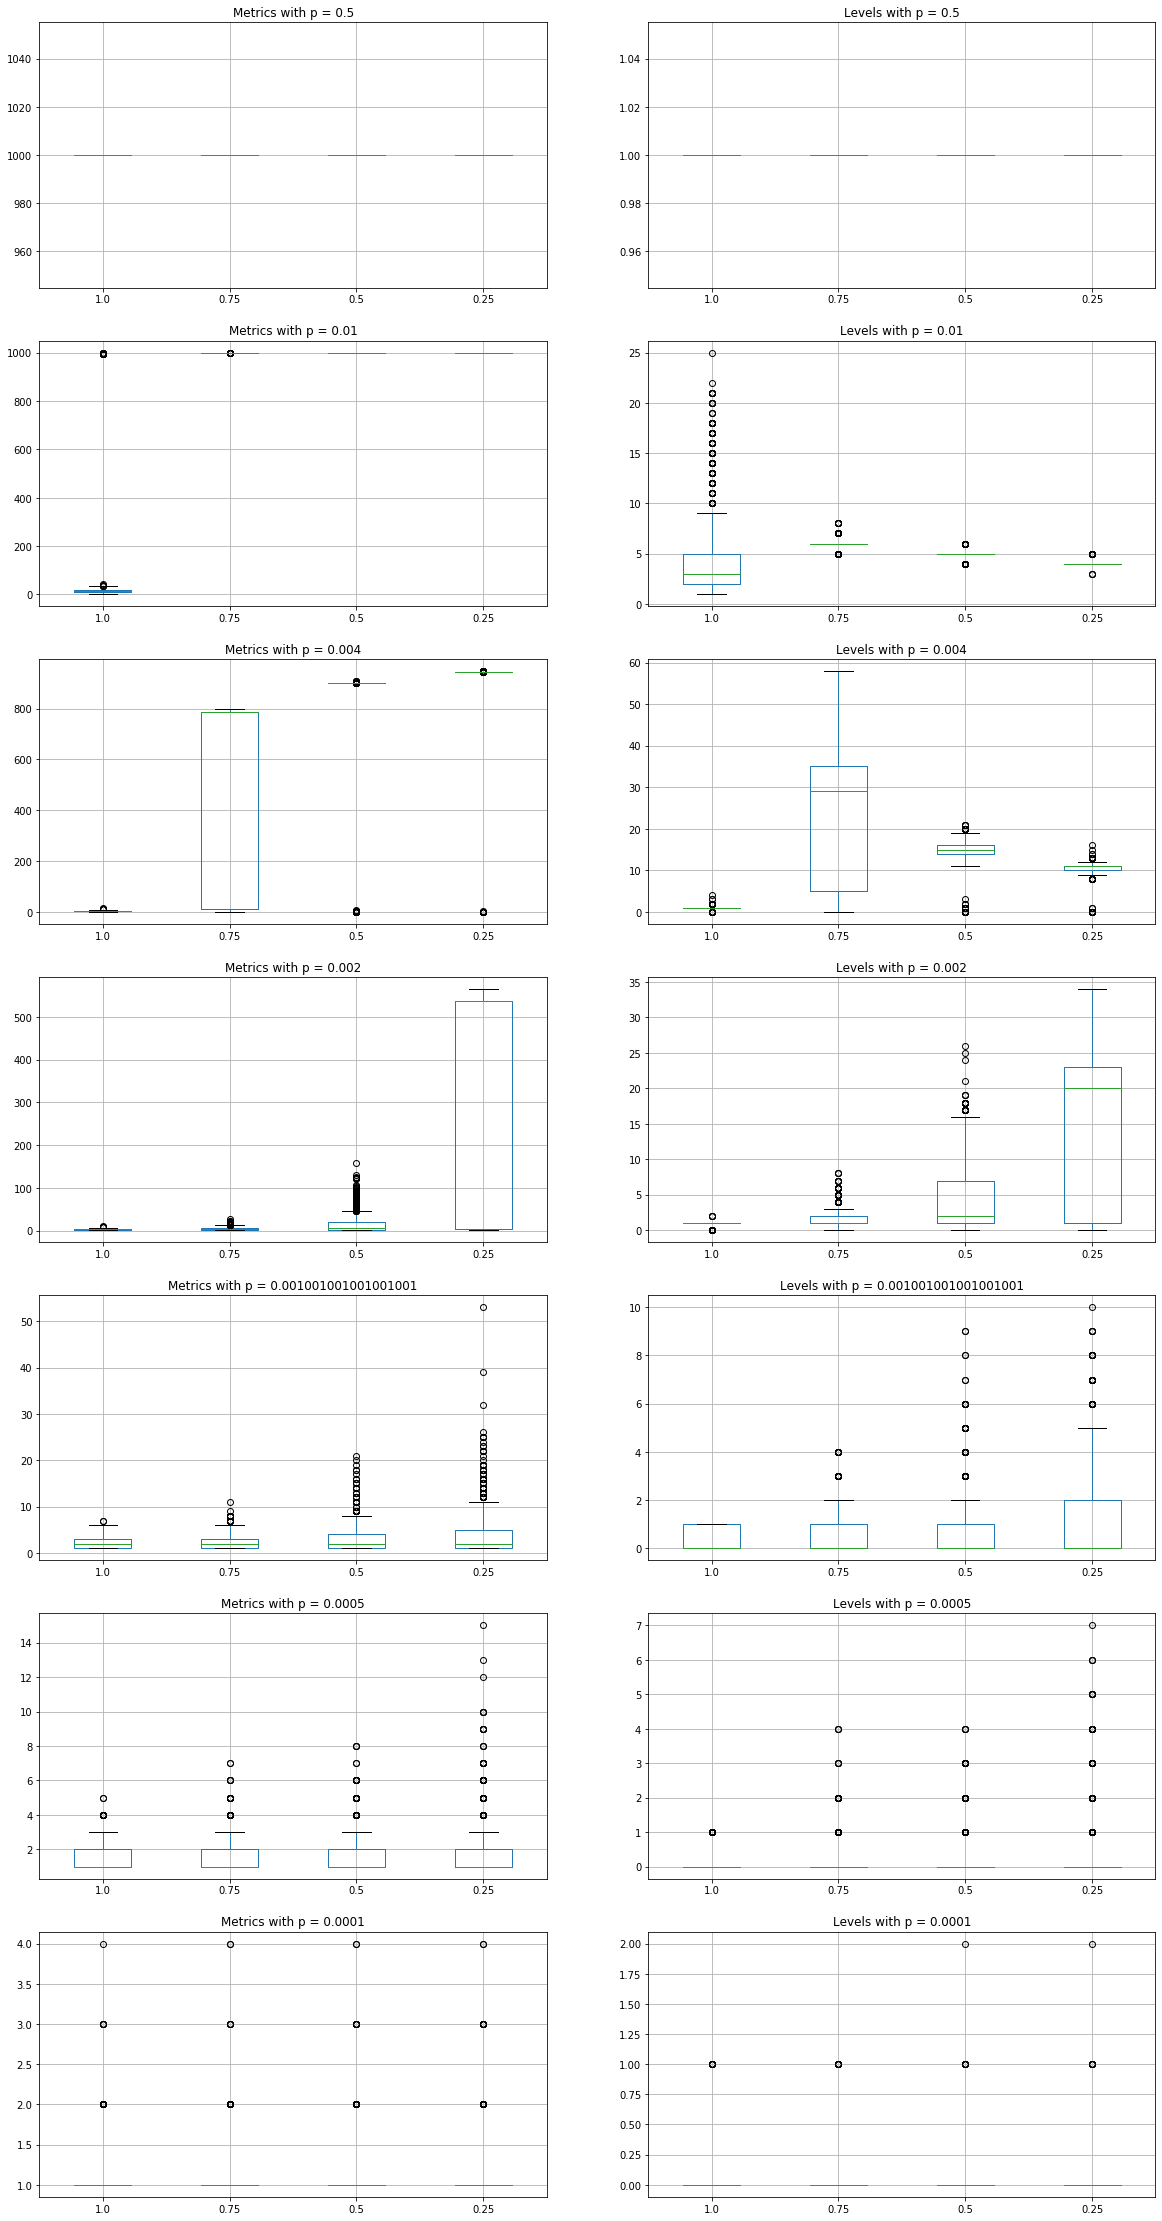

In [5]:
plot_data(True, data_dir)

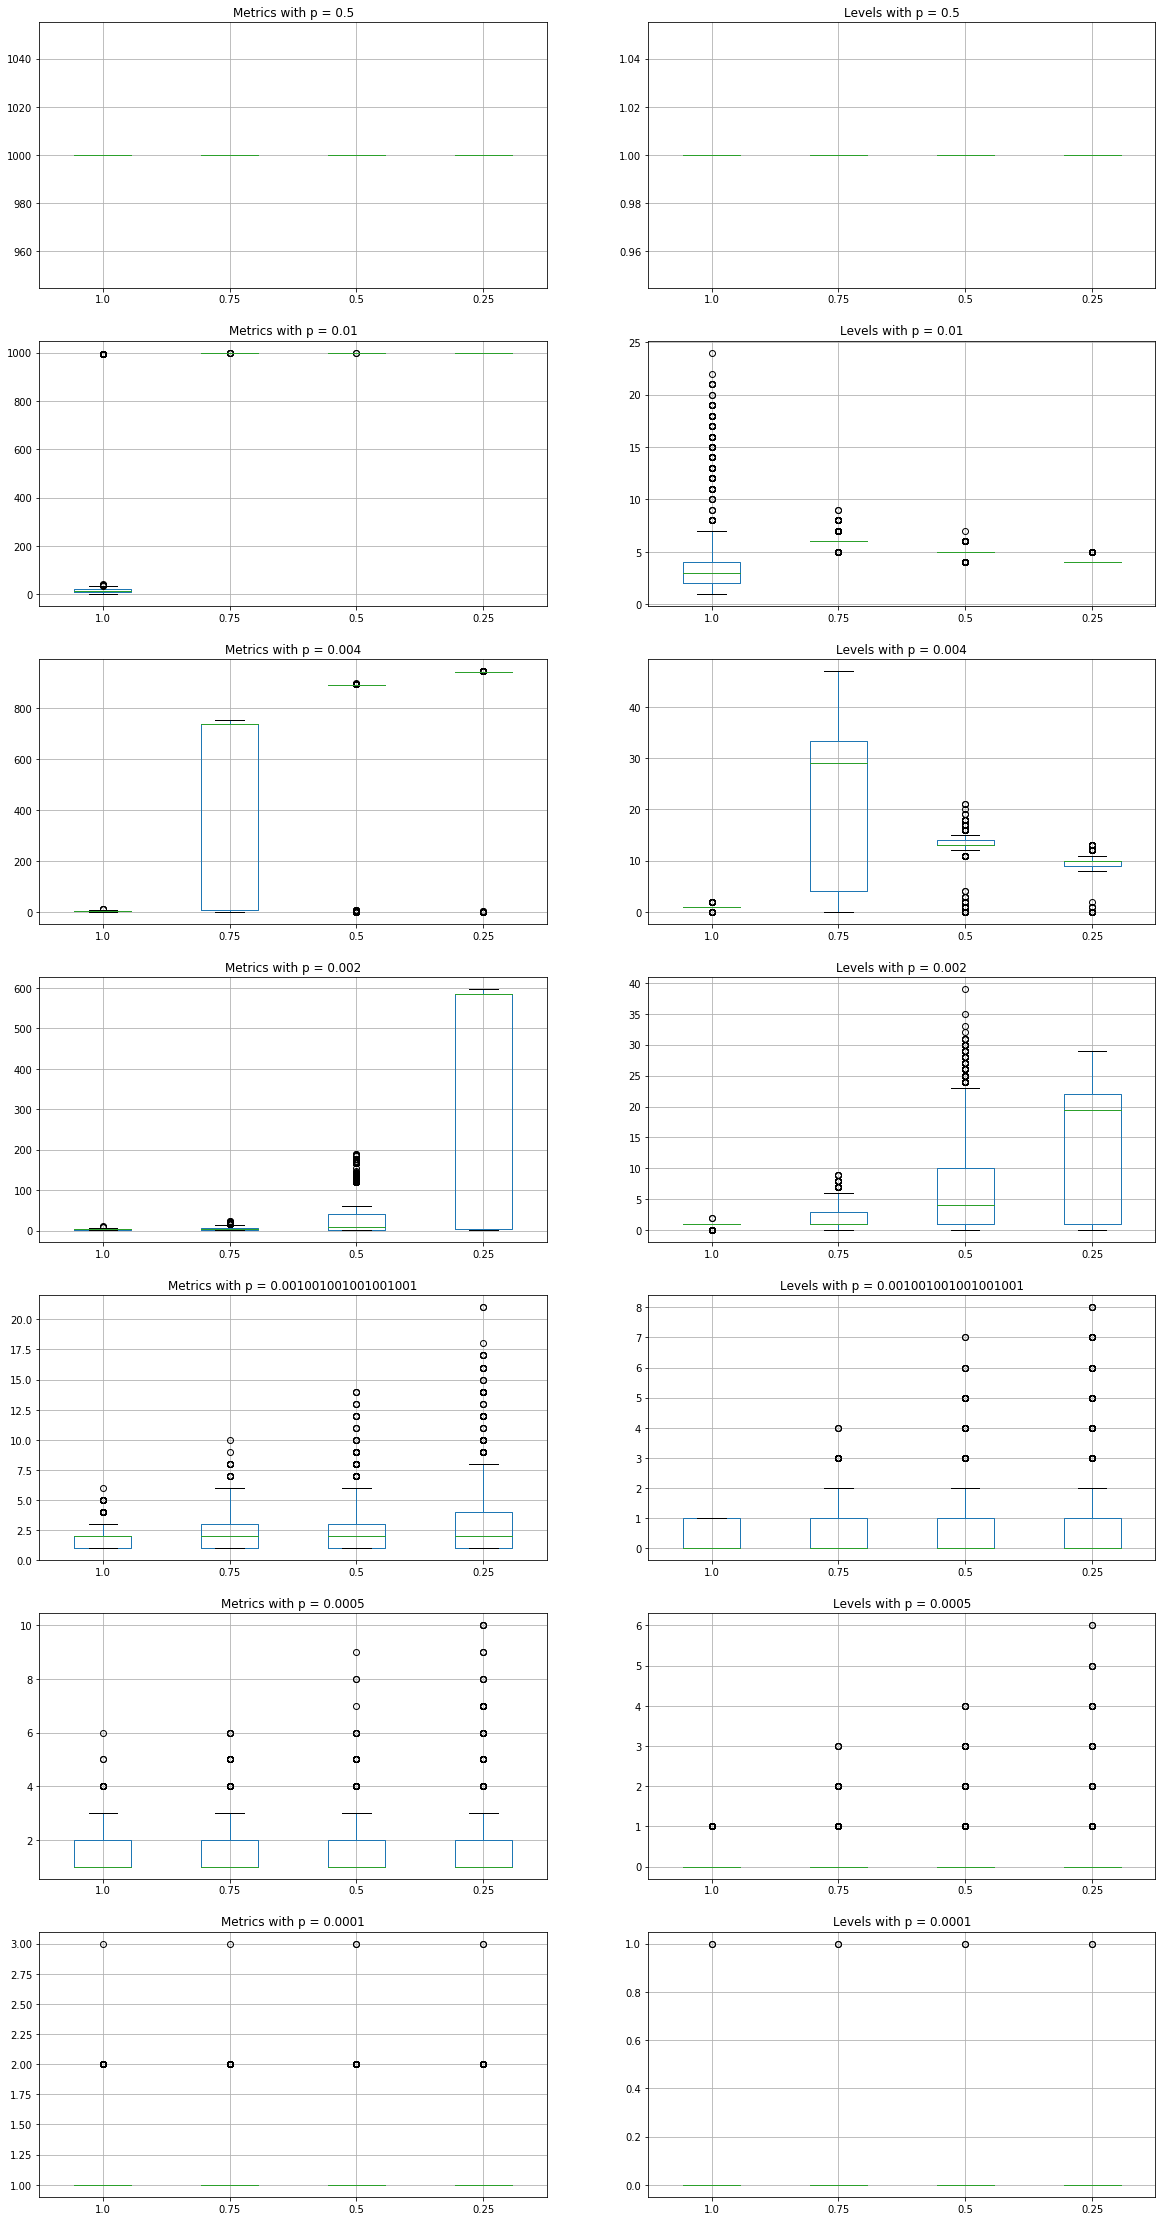

In [6]:
plot_data(False, data_und)

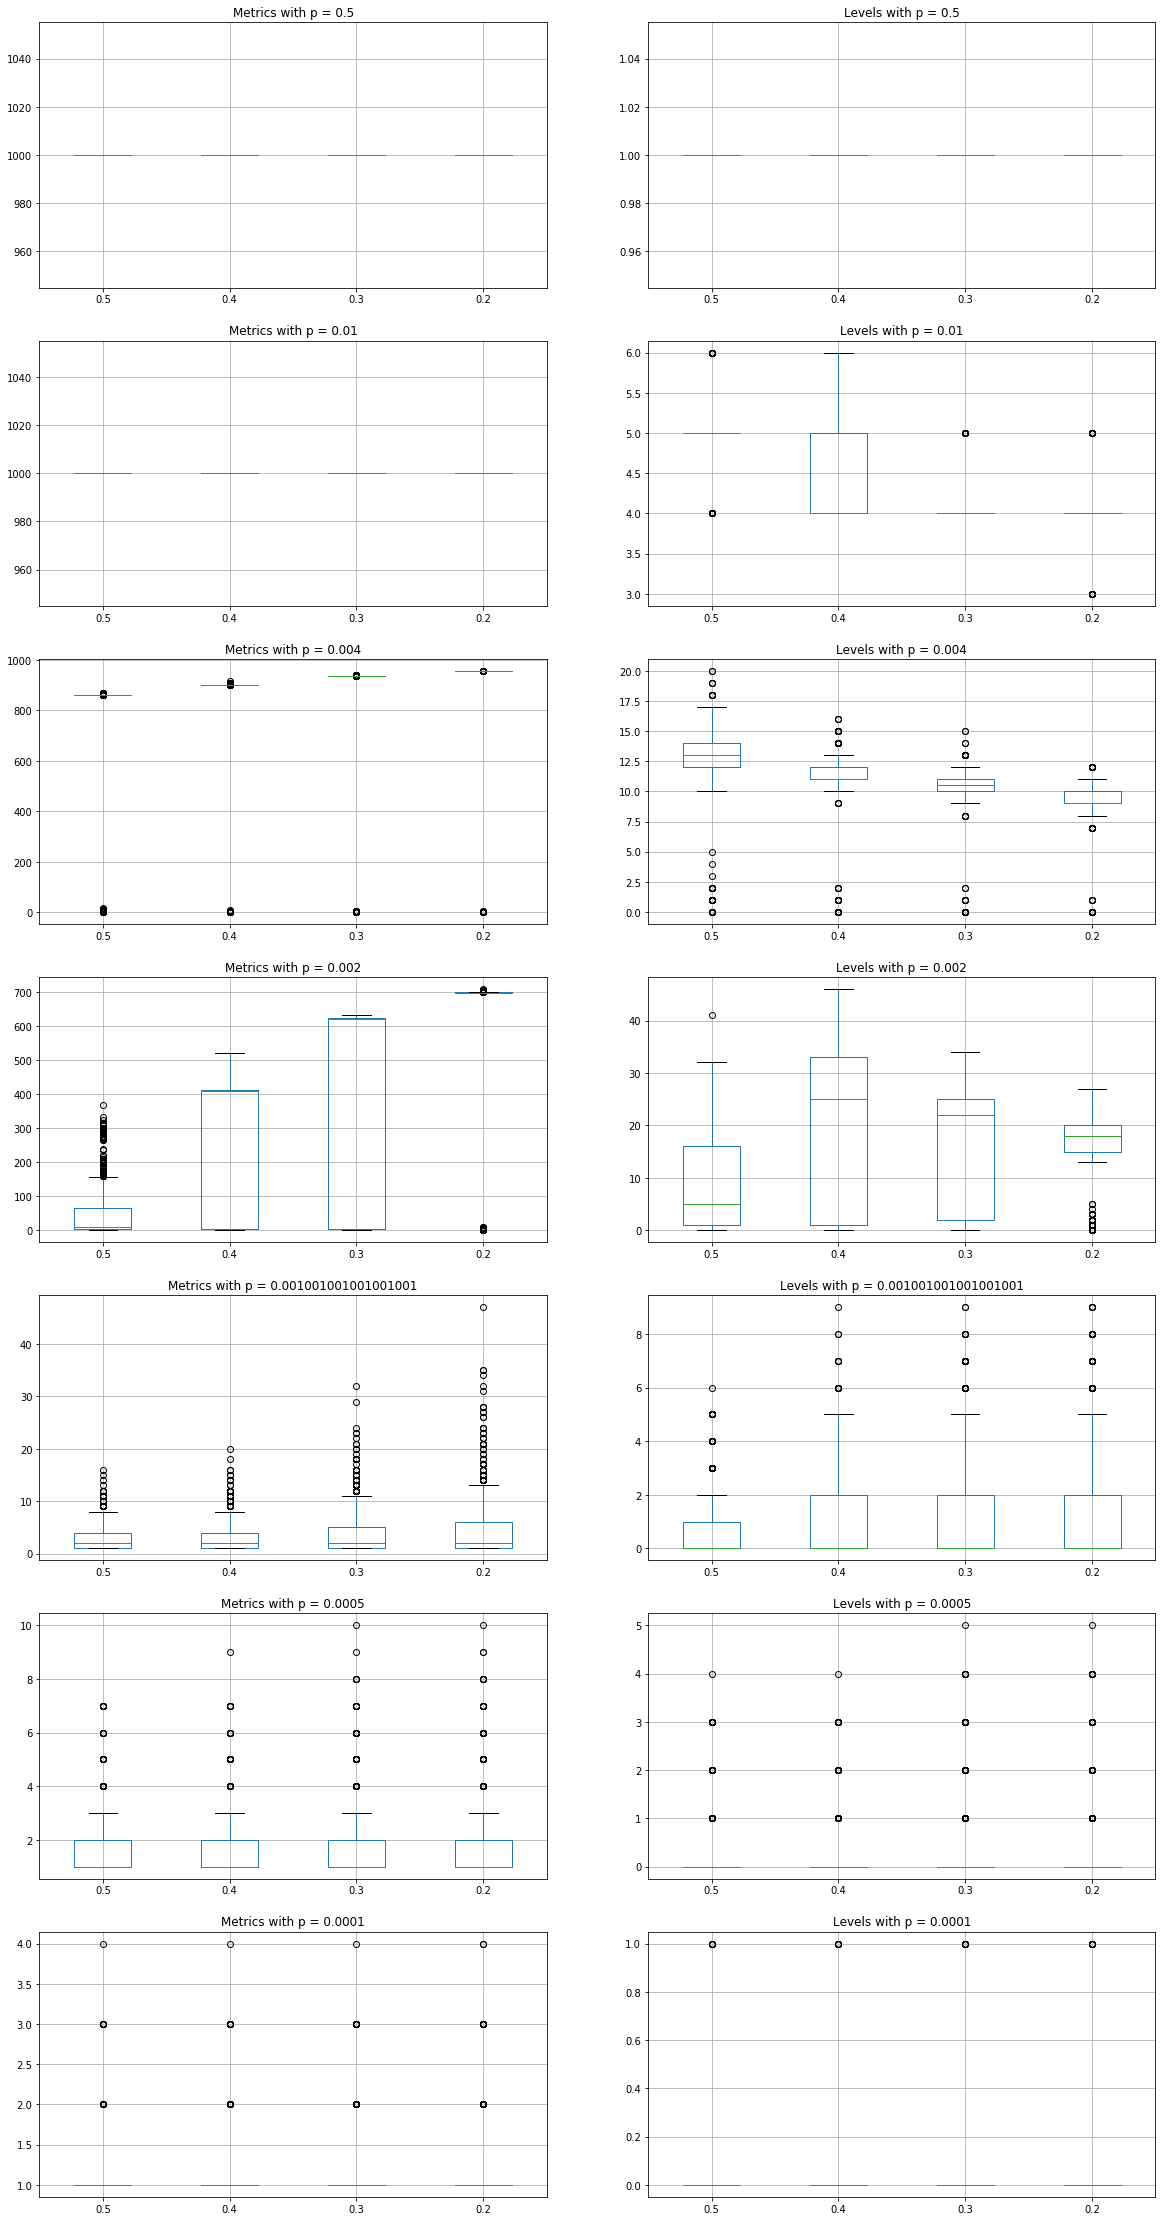

In [7]:
plot_data(True, data_dir_ref, True)

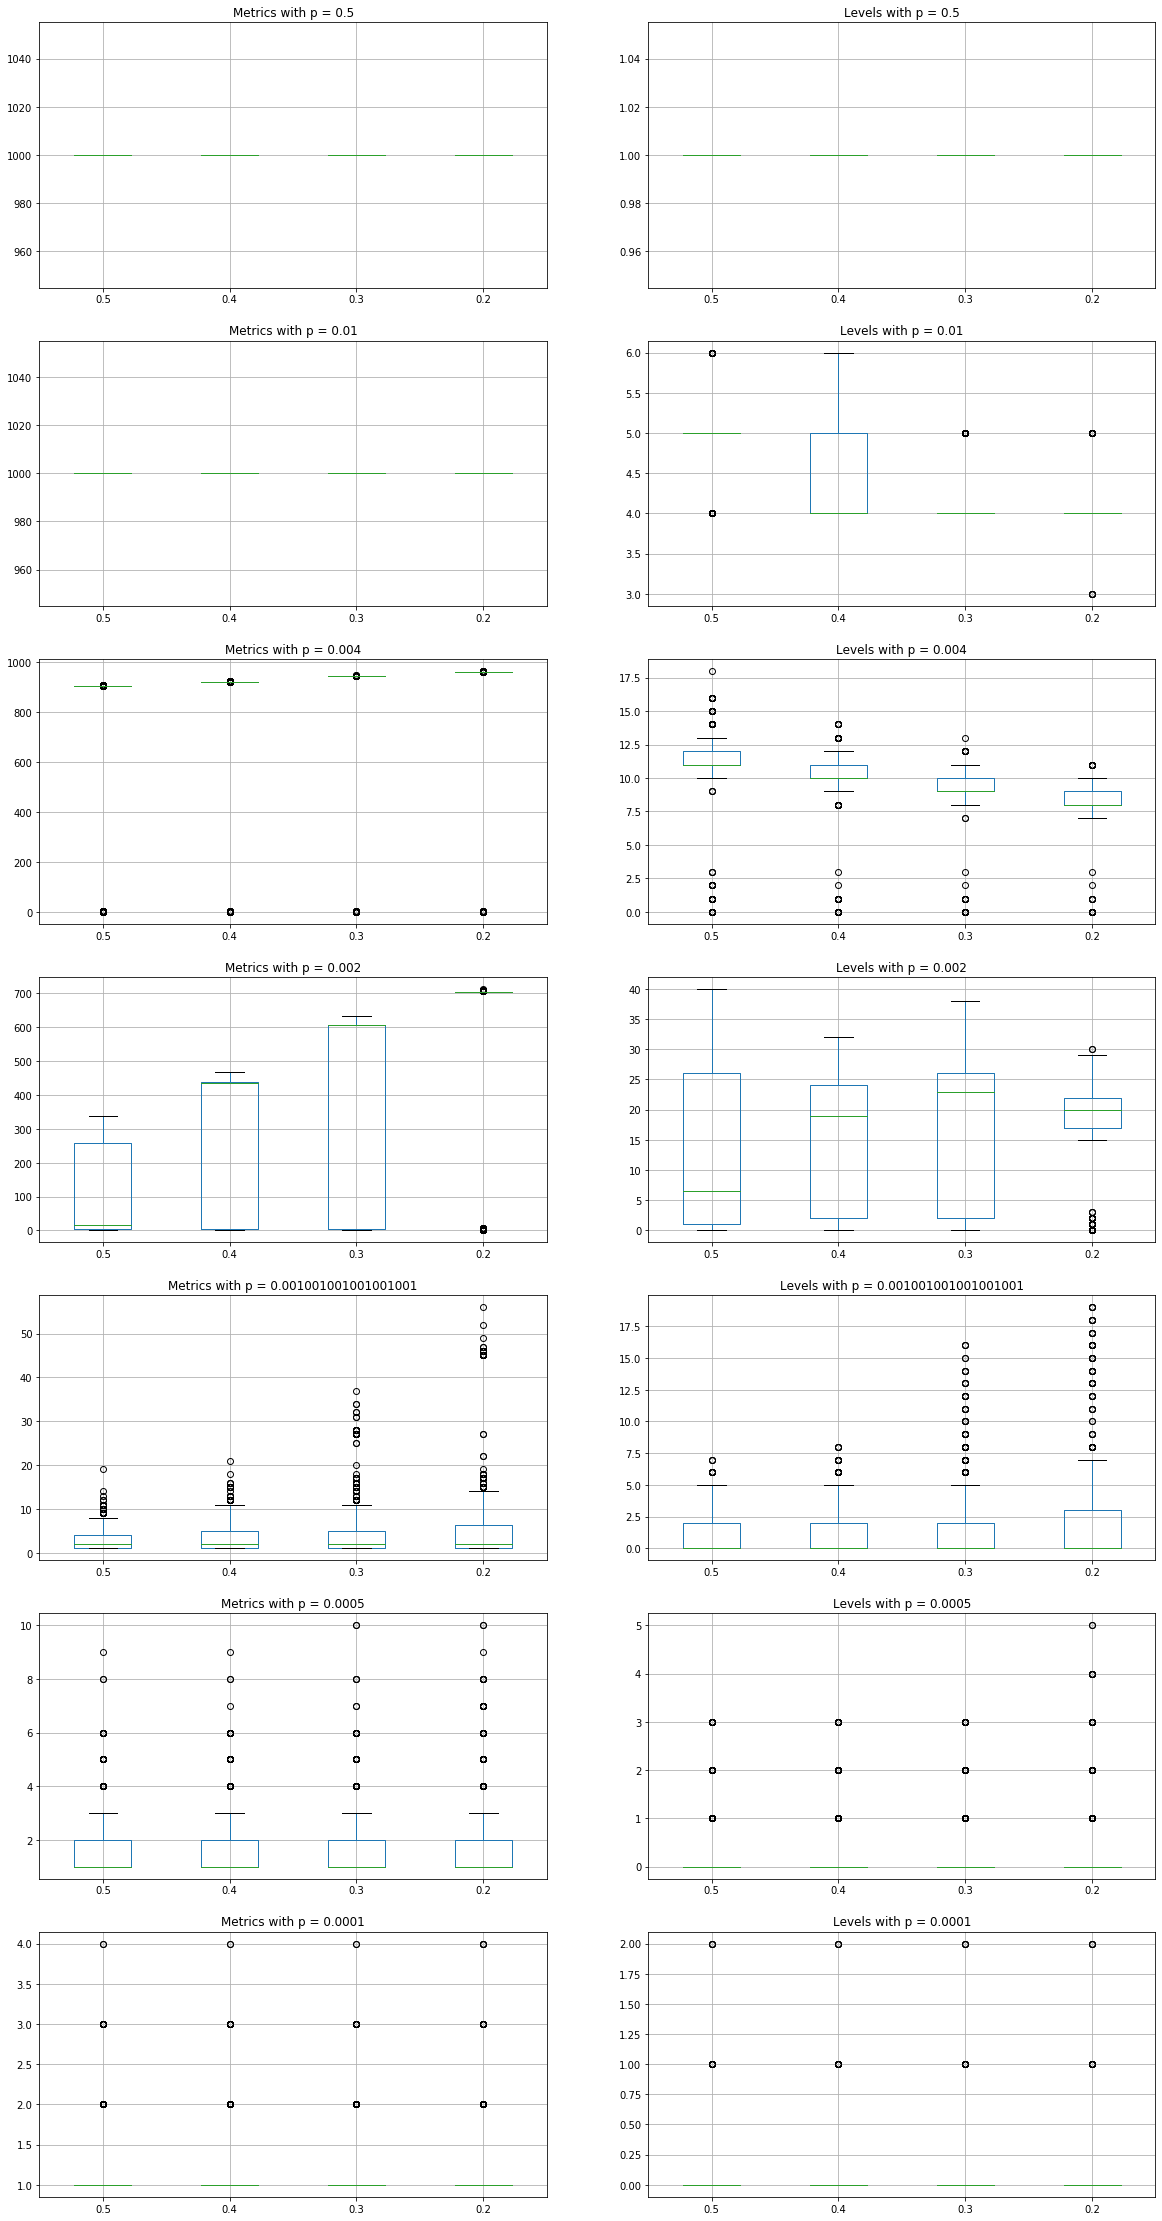

In [8]:
plot_data(False, data_und_ref, True)

In [9]:
def plot_stats(directed, data, refinement = False):
    
    if directed: 
        lab = 'directed'
    else : lab = 'undirected'  
        
    if refinement: 
        ref = '_ref'
    else : ref = ''
    
    fig, axs = plt.subplots(7,2,figsize = (20,40))
    
    for i, k in enumerate(data.keys()):
        axs[i,0].set_title('AVG Metrics with p = {}'.format(k))
        data[k].plot(kind='line',x='res',y='avg_FLTR',ax=axs[i,0])
        axs[i,1].set_title('AVG Levels with p = {}'.format(k))
        data[k].plot(kind='line',x='res',y='avg_exp_level',ax=axs[i,1])    

    plt.savefig('images/statsplot_{}{}.jpeg'.format(lab, ref))
    
    return

In [10]:
print("### DIRECTED ###", end = "\n\n")
for k in stats_dir.keys():
    print("Gnp with p = ", k)
    print(stats_dir[k], end = "\n\n")

### DIRECTED ###

Gnp with p =  0.5
    res  avg_FLTR  avg_exp_level
0  1.00    1000.0            1.0
1  0.75    1000.0            1.0
2  0.50    1000.0            1.0
3  0.25    1000.0            1.0

Gnp with p =  0.01
    res  avg_FLTR  avg_exp_level
0  1.00   160.260          4.576
1  0.75   997.013          6.076
2  0.50  1000.000          4.939
3  0.25  1000.000          4.035

Gnp with p =  0.004
    res  avg_FLTR  avg_exp_level
0  1.00     5.074          1.043
1  0.75   461.227         22.802
2  0.50   870.628         14.559
3  0.25   924.325         10.478

Gnp with p =  0.002
    res  avg_FLTR  avg_exp_level
0  1.00     2.927          0.789
1  0.75     4.503          1.647
2  0.50    15.778          4.652
3  0.25   343.100         14.830

Gnp with p =  0.001001001001001001
    res  avg_FLTR  avg_exp_level
0  1.00     2.015          0.456
1  0.75     2.319          0.619
2  0.50     2.914          0.866
3  0.25     3.996          1.209

Gnp with p =  0.0005
    res  avg_FLTR  

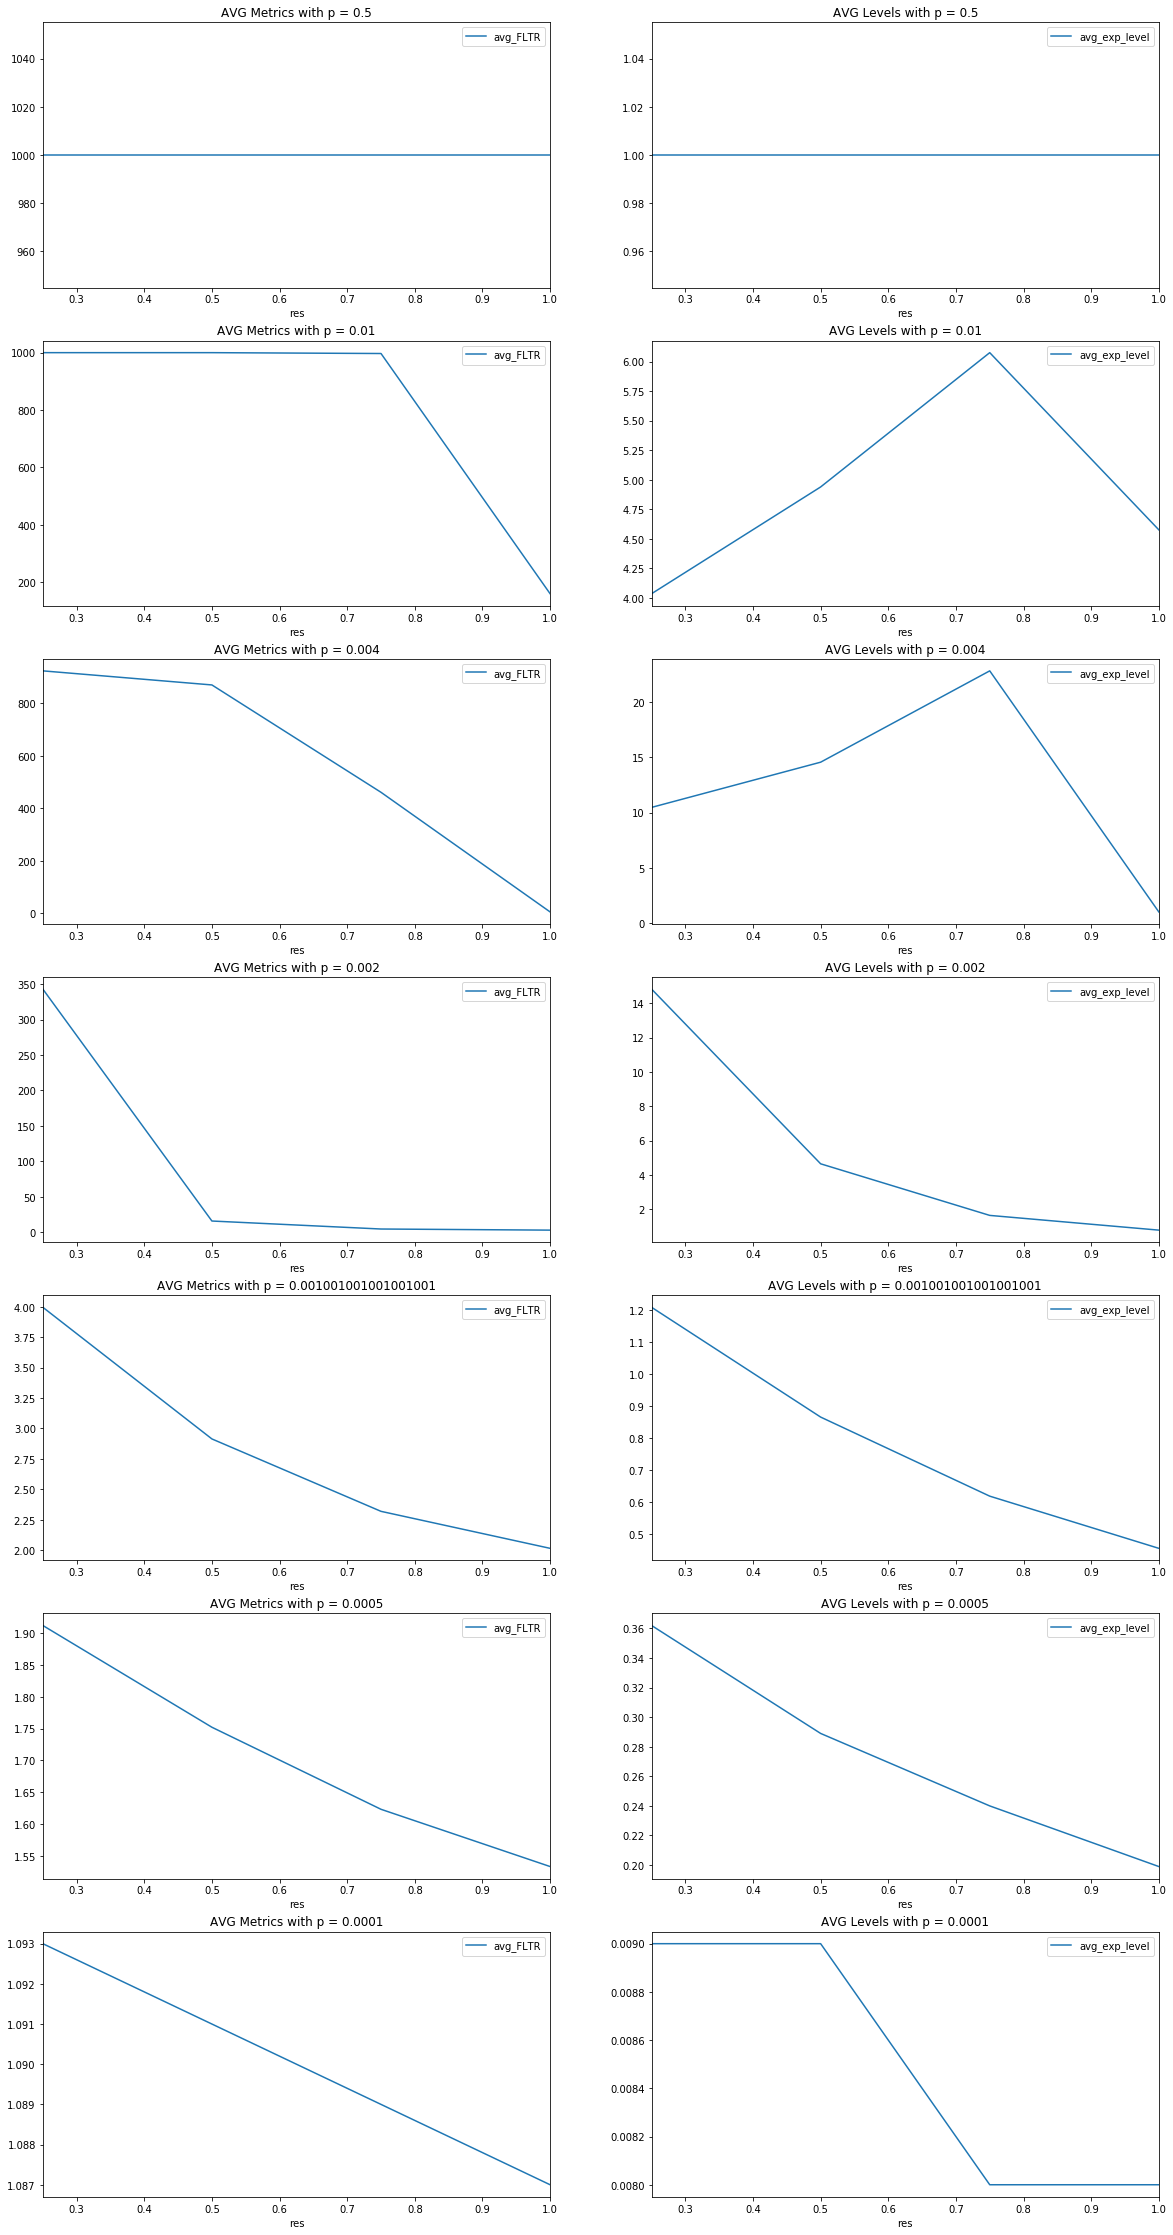

In [11]:
plot_stats(True, stats_dir)

In [12]:
print("### UNDIRECTED ###", end = "\n\n")

for k in stats_und.keys():
    print("Gnp with p = ", k)
    print(stats_und[k], end = "\n\n")

### UNDIRECTED ###

Gnp with p =  0.5
    res  avg_FLTR  avg_exp_level
0  1.00    1000.0            1.0
1  0.75    1000.0            1.0
2  0.50    1000.0            1.0
3  0.25    1000.0            1.0

Gnp with p =  0.01
    res  avg_FLTR  avg_exp_level
0  1.00   137.077          4.341
1  0.75   998.005          6.192
2  0.50   999.002          4.984
3  0.25  1000.000          4.133

Gnp with p =  0.004
    res  avg_FLTR  avg_exp_level
0  1.00     4.809          1.003
1  0.75   417.589         20.316
2  0.50   841.493         13.049
3  0.25   914.801          9.495

Gnp with p =  0.002
    res  avg_FLTR  avg_exp_level
0  1.00     2.942          0.795
1  0.75     5.075          2.020
2  0.50    37.576          7.694
3  0.25   402.601         14.758

Gnp with p =  0.001001001001001001
    res  avg_FLTR  avg_exp_level
0  1.00     1.944          0.430
1  0.75     2.207          0.565
2  0.50     2.680          0.758
3  0.25     3.363          0.988

Gnp with p =  0.0005
    res  avg_FLTR

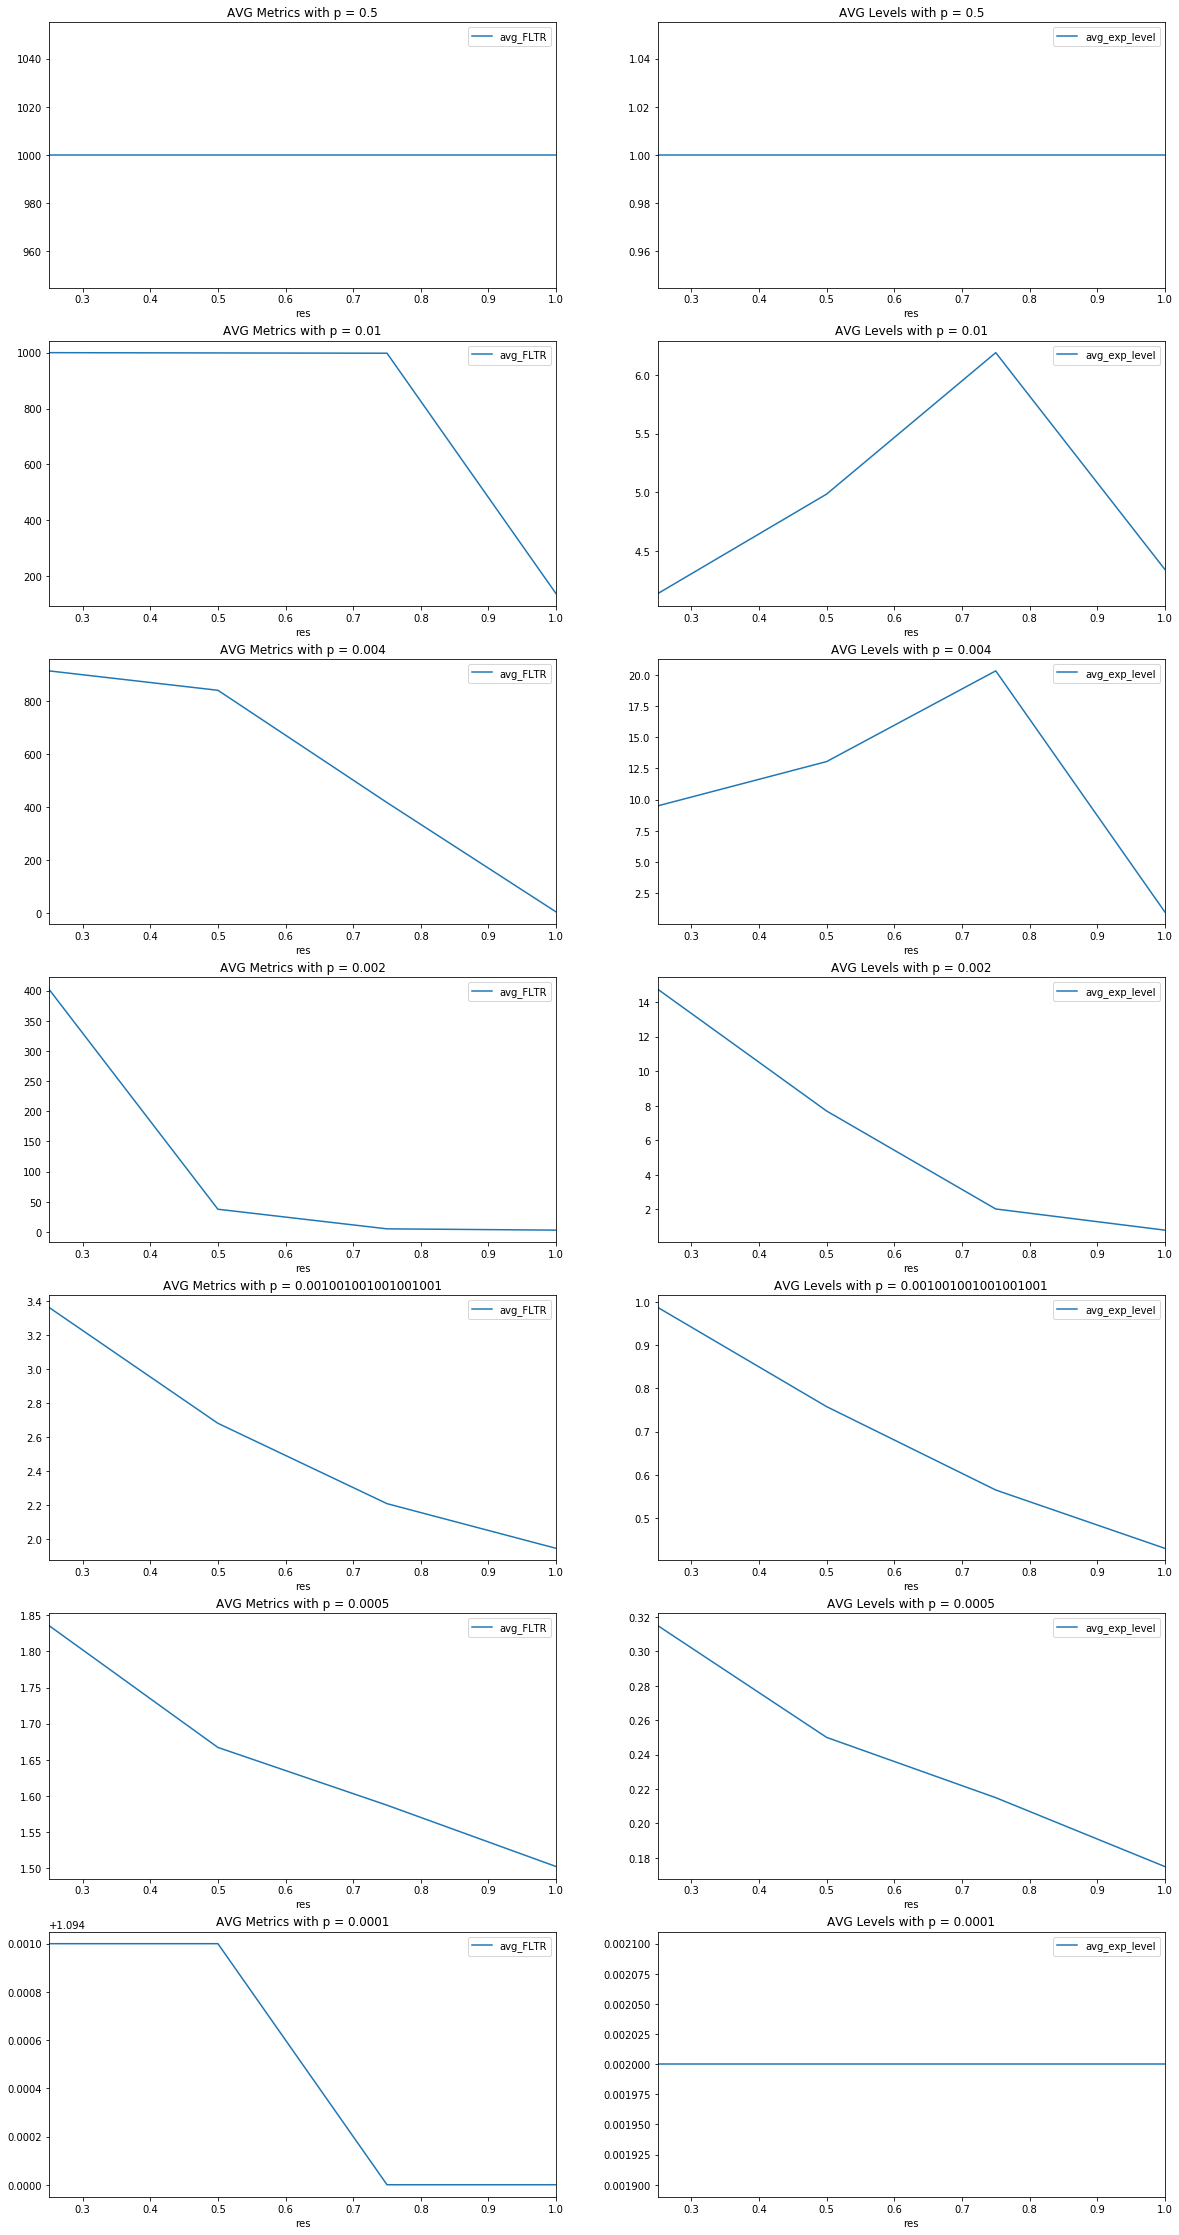

In [13]:
plot_stats(False, stats_und)

In [14]:
print("### REFINEMENT DIRECTED ###", end = "\n\n")
for k in stats_dir_ref.keys():
    print("Gnp with p = ", k)
    print(stats_dir_ref[k], end = "\n\n")

### REFINEMENT DIRECTED ###

Gnp with p =  0.5
   res  avg_FLTR  avg_exp_level
0  0.5    1000.0            1.0
1  0.4    1000.0            1.0
2  0.3    1000.0            1.0
3  0.2    1000.0            1.0

Gnp with p =  0.01
   res  avg_FLTR  avg_exp_level
0  0.5    1000.0          4.828
1  0.4    1000.0          4.360
2  0.3    1000.0          4.086
3  0.2    1000.0          4.004

Gnp with p =  0.004
   res  avg_FLTR  avg_exp_level
0  0.5   814.361         12.444
1  0.4   866.351         11.080
2  0.3   906.268         10.261
3  0.2   926.465          9.061

Gnp with p =  0.002
   res  avg_FLTR  avg_exp_level
0  0.5    46.177          8.978
1  0.4   239.333         18.855
2  0.3   424.827         16.623
3  0.2   533.608         14.705

Gnp with p =  0.001001001001001001
   res  avg_FLTR  avg_exp_level
0  0.5     2.842          0.837
1  0.4     3.204          0.986
2  0.3     3.799          1.212
3  0.2     4.501          1.418

Gnp with p =  0.0005
   res  avg_FLTR  avg_exp_level
0

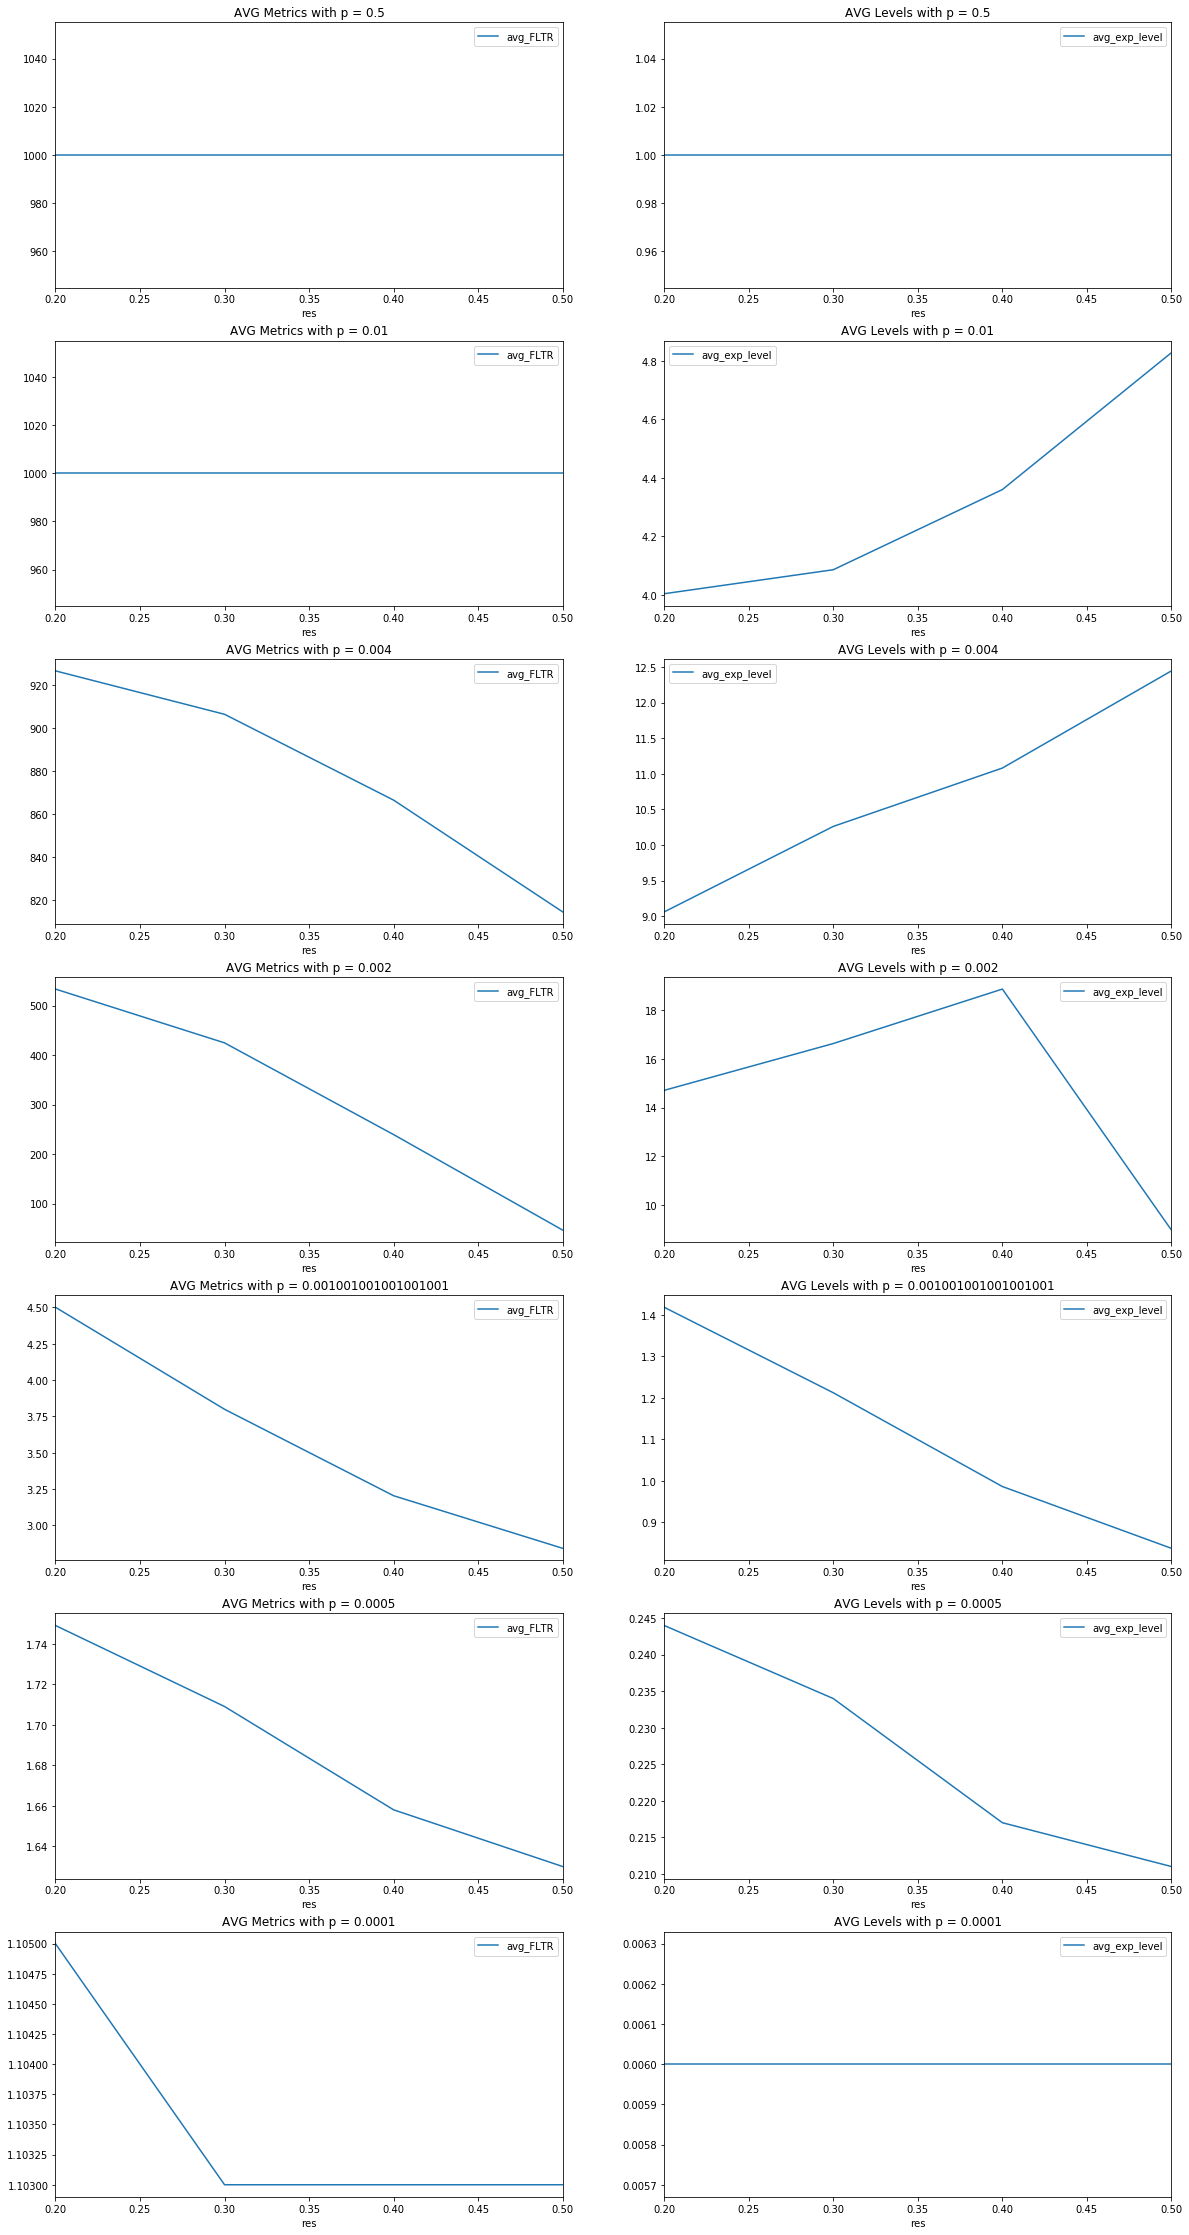

In [15]:
plot_stats(True, stats_dir_ref, True)

In [16]:
print("### REFINEMENT UNDIRECTED ###", end = "\n\n")
for k in stats_und_ref.keys():
    print("Gnp with p = ", k)
    print(stats_und_ref[k], end = "\n\n")

### REFINEMENT UNDIRECTED ###

Gnp with p =  0.5
   res  avg_FLTR  avg_exp_level
0  0.5    1000.0            1.0
1  0.4    1000.0            1.0
2  0.3    1000.0            1.0
3  0.2    1000.0            1.0

Gnp with p =  0.01
   res  avg_FLTR  avg_exp_level
0  0.5    1000.0          4.894
1  0.4    1000.0          4.434
2  0.3    1000.0          4.119
3  0.2    1000.0          4.015

Gnp with p =  0.004
   res  avg_FLTR  avg_exp_level
0  0.5   868.129         11.266
1  0.4   894.440         10.031
2  0.3   918.582          9.029
3  0.2   938.007          8.267

Gnp with p =  0.002
   res  avg_FLTR  avg_exp_level
0  0.5   106.265         12.362
1  0.4   240.539         14.270
2  0.3   440.129         18.596
3  0.2   547.032         16.252

Gnp with p =  0.001001001001001001
   res  avg_FLTR  avg_exp_level
0  0.5     2.948          0.972
1  0.4     3.452          1.188
2  0.3     4.612          1.650
3  0.2     6.284          2.045

Gnp with p =  0.0005
   res  avg_FLTR  avg_exp_level

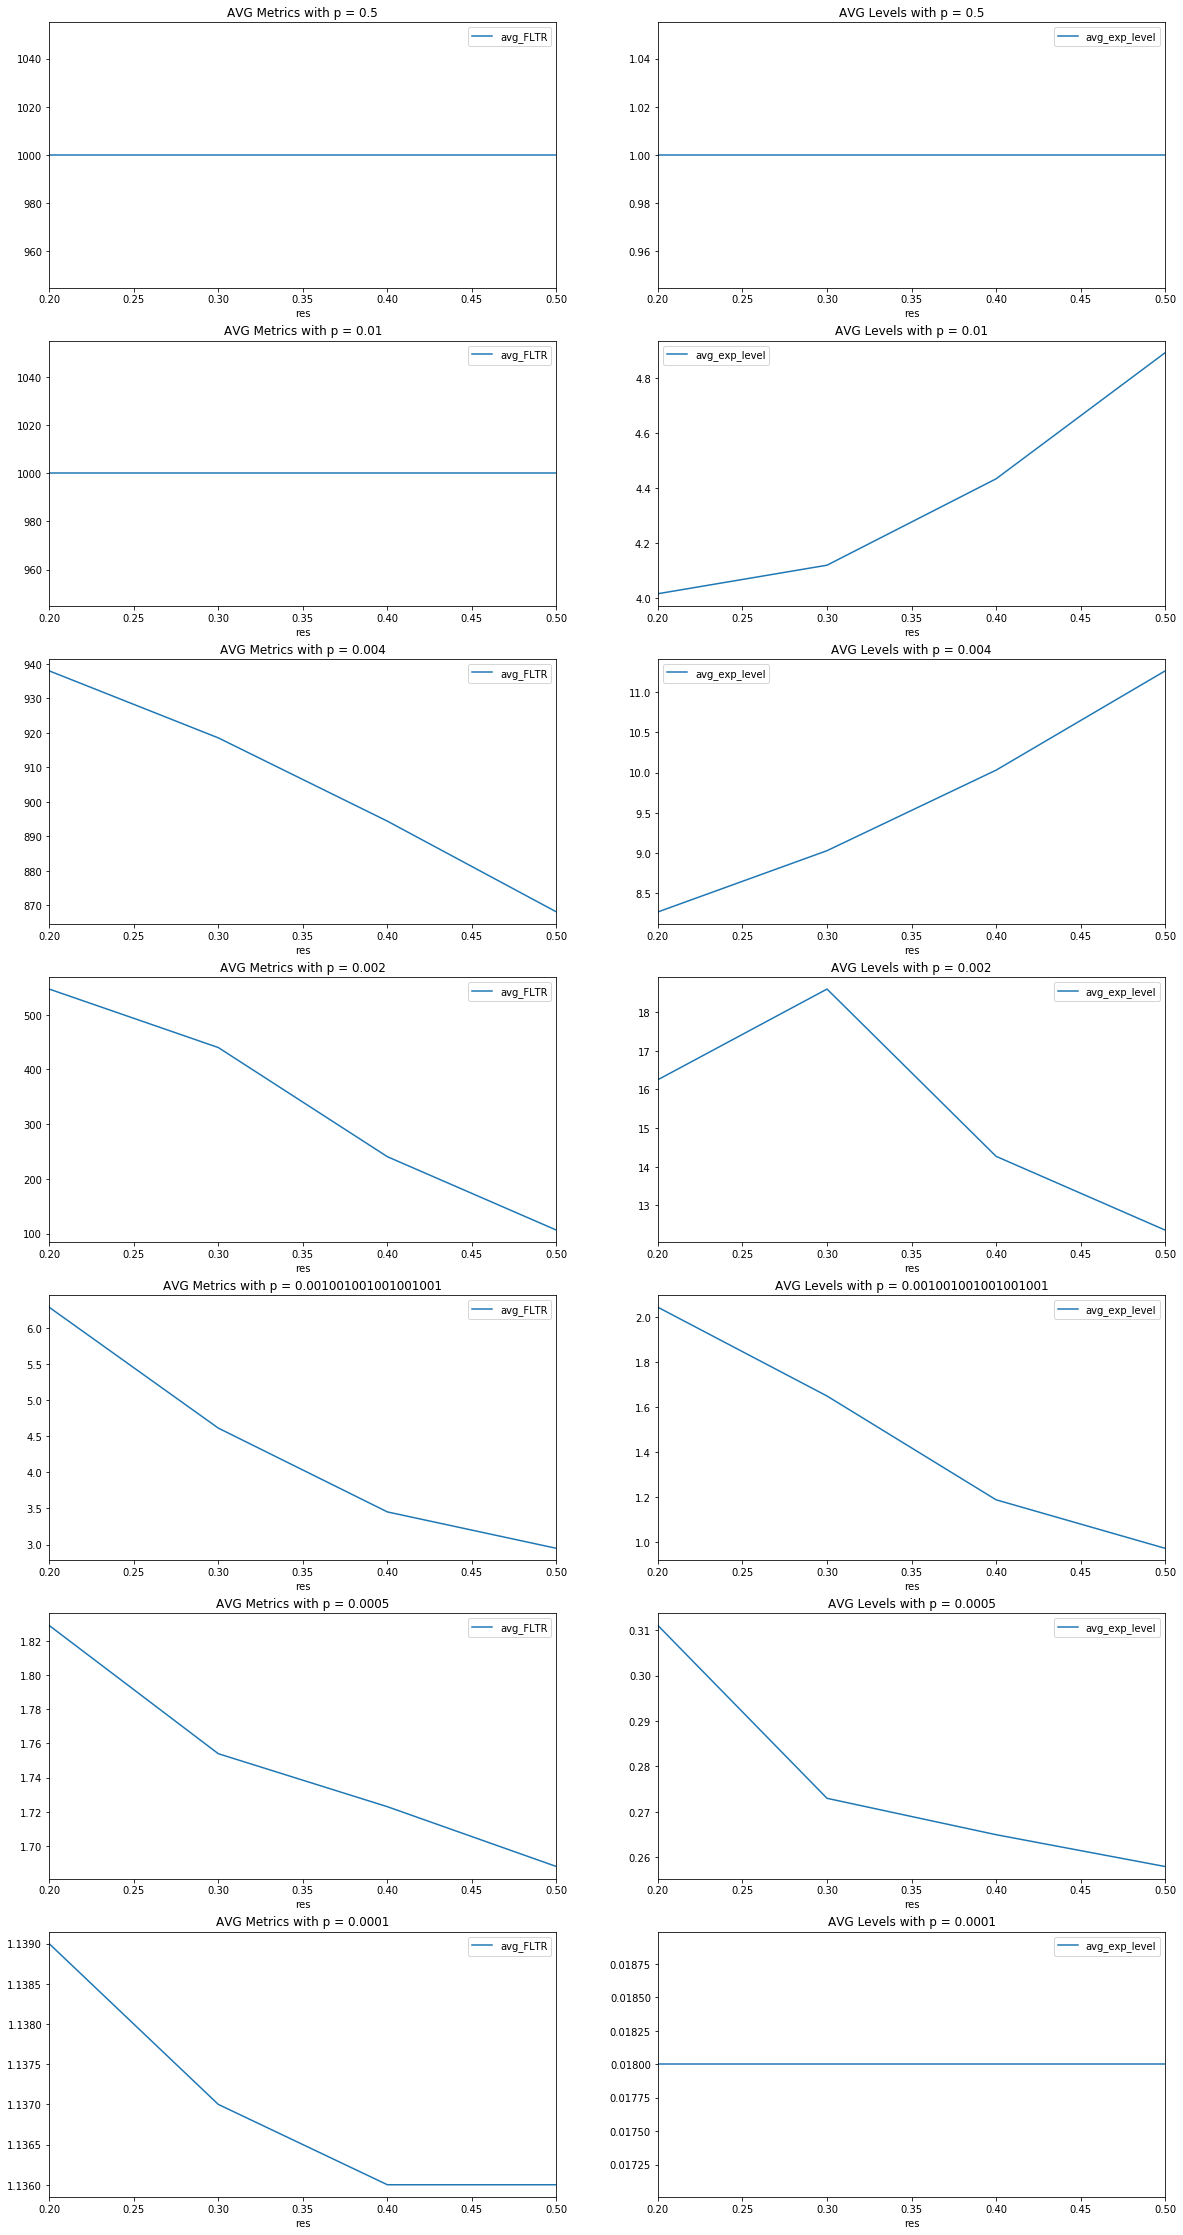

In [17]:
plot_stats(False, stats_und_ref, True)